<a href="https://colab.research.google.com/github/happiness133-python/python/blob/main/Combined_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Google drive csatlakoztatása:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


HDD csv file import:

In [4]:
file_path = '/content/drive/MyDrive/python/HDD_CDD_2024/Combined_2024.csv'

consumption = pd.read_csv(
    file_path, parse_dates=['Időbélyeg'],
    on_bad_lines='skip', # Skip lines with errors
    sep=',',  # Uncomment and replace ';' with the actual delimiter if it's not a comma
    #skiprows=6  # This line skips the first 3 rows
)

In [5]:
consumption.head()

,Időbélyeg,Deregulációs POD - Technikai POD,Cím,Korrektor,Mérő,Órás korrigált fogyasztás [m3],Órás átlag hőmérséklet [Celsius]
0,2024-01-01 07:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,52.027,6.23
1,2024-01-01 09:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,53.762,6.4
2,2024-01-01 10:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,51.903,6.66
3,2024-01-01 11:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,53.700,6.56
4,2024-01-01 12:00:00,39N112716819000S - 39N112719266000V,4063 DEBRECEN Déli Ipari park 0503 /34,K26950900007058,K36220381780102,53.791,6.44


Hőmérséklet diagramm:

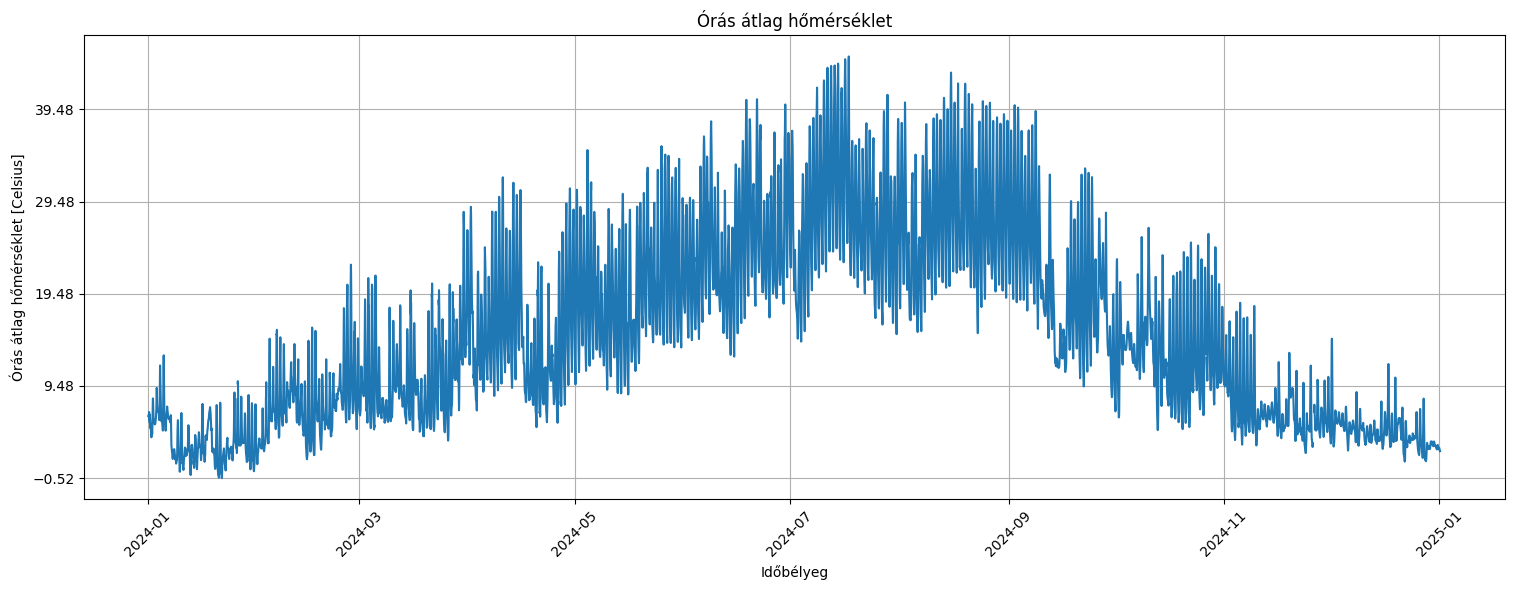

In [8]:
# Convert the column to numeric, coercing errors to NaN
consumption['Órás átlag hőmérséklet [Celsius]'] = pd.to_numeric(consumption['Órás átlag hőmérséklet [Celsius]'], errors='coerce')

# Hőmérséklet diagramm:
plt.figure(figsize=(15, 6))
plt.plot(consumption['Időbélyeg'], consumption['Órás átlag hőmérséklet [Celsius]'])
plt.xlabel('Időbélyeg')
plt.ylabel('Órás átlag hőmérséklet [Celsius]')
plt.title('Órás átlag hőmérséklet')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Calculate min and max after converting to numeric
min_temp = consumption['Órás átlag hőmérséklet [Celsius]'].min()
max_temp = consumption['Órás átlag hőmérséklet [Celsius]'].max()

# Set y-ticks using the numeric min and max
plt.yticks(np.arange(min_temp, max_temp + 1, 10))

plt.show()

Éves átlag hőmérséklet:

In [12]:
yearly_average_temperature = consumption['Órás átlag hőmérséklet [Celsius]'].mean()
print(yearly_average_temperature)

15.373572649572651


Korreláció:

In [13]:
# Assuming 'consumption' is your DataFrame

# Convert both columns to numeric, handling errors
consumption['Órás korrigált fogyasztás [m3]'] = pd.to_numeric(consumption['Órás korrigált fogyasztás [m3]'], errors='coerce')
consumption['Órás átlag hőmérséklet [Celsius]'] = pd.to_numeric(consumption['Órás átlag hőmérséklet [Celsius]'], errors='coerce')

# Calculate the correlation
correlation = consumption['Órás korrigált fogyasztás [m3]'].corr(consumption['Órás átlag hőmérséklet [Celsius]'])

print(f"Correlation between Órás korrigált fogyasztás [m3] and Órás átlag hőmérséklet [Celsius]: {correlation}")

Correlation between Órás korrigált fogyasztás [m3] and Órás átlag hőmérséklet [Celsius]: -0.7742354503527824


Két diagram egymáson:

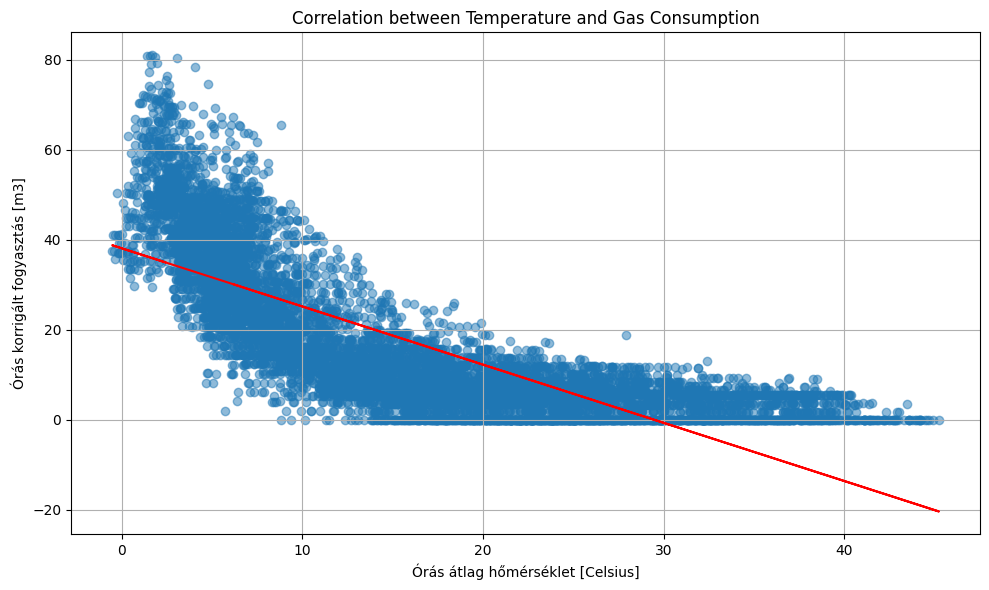

In [16]:
# Assuming 'consumption' is your DataFrame and the columns are already numeric

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Remove NaN values from both x and y before fitting the line
x = consumption['Órás átlag hőmérséklet [Celsius]'].dropna()
y = consumption['Órás korrigált fogyasztás [m3]'].dropna()

# Only keep values where both x and y are valid
valid_indices = x.index.intersection(y.index)
x = x.loc[valid_indices]
y = y.loc[valid_indices]

plt.scatter(x, y, alpha=0.5)  # alpha for transparency

# Add labels and title
plt.xlabel('Órás átlag hőmérséklet [Celsius]')
plt.ylabel('Órás korrigált fogyasztás [m3]')
plt.title('Correlation between Temperature and Gas Consumption')

# Optional: Add a trend line (using numpy for a simple linear regression)

m, b = np.polyfit(x, y, 1)  # Fit a line (degree 1)
plt.plot(x, m*x + b, color='red')  # Plot the trend line

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

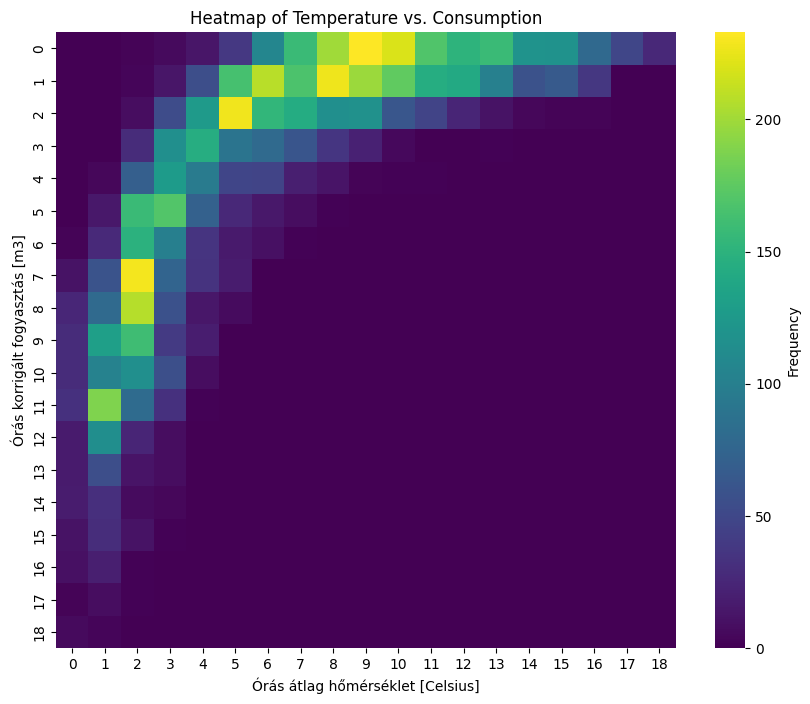

In [18]:
import seaborn as sns

# Assuming 'consumption' is your DataFrame

# Convert relevant columns to numeric, handling errors
consumption['Órás korrigált fogyasztás [m3]'] = pd.to_numeric(consumption['Órás korrigált fogyasztás [m3]'], errors='coerce')
consumption['Órás átlag hőmérséklet [Celsius]'] = pd.to_numeric(consumption['Órás átlag hőmérséklet [Celsius]'], errors='coerce')

# Drop rows with NaN values in the relevant columns
consumption = consumption.dropna(subset=['Órás korrigált fogyasztás [m3]', 'Órás átlag hőmérséklet [Celsius]'])

# Define bin edges for temperature and consumption
temp_bins = np.linspace(consumption['Órás átlag hőmérséklet [Celsius]'].min(), consumption['Órás átlag hőmérséklet [Celsius]'].max(), 20)
cons_bins = np.linspace(consumption['Órás korrigált fogyasztás [m3]'].min(), consumption['Órás korrigált fogyasztás [m3]'].max(), 20)

# Create a 2D histogram (heatmap data)
heatmap_data, xedges, yedges = np.histogram2d(
    consumption['Órás átlag hőmérséklet [Celsius]'],
    consumption['Órás korrigált fogyasztás [m3]'],
    bins=[temp_bins, cons_bins]
)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data.T, cmap='viridis', cbar_kws={'label': 'Frequency'})
plt.xlabel('Órás átlag hőmérséklet [Celsius]')
plt.ylabel('Órás korrigált fogyasztás [m3]')
plt.title('Heatmap of Temperature vs. Consumption')
plt.show()